# The Happiest Place to live (2015-2017)

#### I will analyze this data to find out the happiest countries on Earth. Then I will show the top factors stated by the happiest country.

In [1]:
# Importing libraries needed for this project
import os
import pandas as pd
import glob
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function to combine all csv files to 1 file
def concatenate(indir="in\\Extracted", outfile="../../out/Concatenated.csv"):
    os.chdir(indir)
    fileList=glob.glob("*.csv")
    dfList=[]
    colnames=["Year","Country","Region","HappinessRank","HappinessScore","Economy(GDPperCapita)","Family","Health(LifeExpectancy)","Freedom","Trust(GovernmentCorruption)","Generosity","DystopiaResidual"]
    for filename in fileList:
        print(filename)
        df=pd.read_csv(filename, skiprows=1, header=None)
        dfList.append(df)
    concatDf=pd.concat(dfList,axis=0)
    concatDf.columns=colnames
    concatDf.to_csv(outfile,index=None)

In [3]:
concatenate()

2015.csv
2016.csv
2017.csv


In [4]:
happiness = pd.read_csv("../../out/Concatenated.csv")

In [5]:
happiness.to_sql('happiness', sqlite3.connect('WorldHappiness.db'), if_exists = "replace")

In [6]:
# happiness.info()

# Column Definitions
##### Year
Year of survey.
##### Country
Name of the country.
##### Region
Region the country belongs to.
##### Happiness Rank
Rank of the country based on the Happiness Score.
##### Happiness Score
A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
##### Economy (GDP per Capita)
The extent to which GDP contributes to the calculation of the Happiness Score.
##### Family
The extent to which Family contributes to the calculation of the Happiness Score
##### Health (Life Expectancy)
The extent to which Life expectancy contributed to the calculation of the Happiness Score
##### Freedom
The extent to which Freedom contributed to the calculation of the Happiness Score.
##### Trust (Government Corruption)
The extent to which Perception of Corruption contributes to Happiness Score.
##### Generosity
The extent to which Generosity contributed to the calculation of the Happiness Score.
##### Dystopia Residual
The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

## Full Dataset (2015, 2016, 2017)

In [7]:
# connectiong to SQL database
con = sqlite3.connect('WorldHappiness.db')
# Calling database
happiness

,Year,Country,Region,HappinessRank,HappinessScore,Economy(GDPperCapita),Family,Health(LifeExpectancy),Freedom,Trust(GovernmentCorruption),Generosity,DystopiaResidual
0,2015,Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
1,2015,Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010
2,2015,Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040
3,2015,Norway,Western Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310
4,2015,Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760
5,2015,Finland,Western Europe,6,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2.619550
6,2015,Netherlands,Western Europe,7,7.378,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2.465700
7,2015,Sweden,Western Europe,8,7.364,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2.371190
8,2015,New Zealand,Australia and New Zealand,9,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2.264250
9,2015,Australia,Australia and New Zealand,10,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2.266460


In [159]:
top5_happiest_2015 = pd.read_sql_query("SELECT * FROM happiness WHERE CAST([HappinessRank] AS INT) <= 5 AND [Year] = 2015 ORDER BY Year, CAST([HappinessRank] AS INT)", con);
top5_happiest_2016 = pd.read_sql_query("SELECT * FROM happiness WHERE CAST([HappinessRank] AS INT) <= 5 AND [Year] = 2016 ORDER BY Year, CAST([HappinessRank] AS INT)", con);
top5_happiest_2017 = pd.read_sql_query("SELECT * FROM happiness WHERE CAST([HappinessRank] AS INT) <= 5 AND [Year] = 2017 ORDER BY Year, CAST([HappinessRank] AS INT)", con);
top10_happiest_avg = pd.read_sql_query("SELECT Country, MAX(Region) AS Region, AVG(CAST([HappinessScore] AS FLOAT)) AS AvgHappinessScore FROM happiness GROUP BY Country ORDER BY AVG(CAST([HappinessScore] AS FLOAT)) DESC LIMIT 10", con);
top_country_happiest_factors = pd.read_sql_query("SELECT Country, MAX(Region) AS Region, AVG(CAST([HappinessScore] AS FLOAT)) AS AvgHappinessScore, AVG(CAST([Economy(GDPperCapita)] AS FLOAT)) AS Economy, AVG(CAST([Family] AS FLOAT)) AS Family, AVG(CAST([Health(LifeExpectancy)] AS FLOAT)) AS [Health(LifeExpectancy)], AVG(CAST([Freedom] AS FLOAT)) AS Freedom, AVG(CAST([Trust(GovernmentCorruption)] AS FLOAT)) AS [Trust(GovernmentCorruption)], AVG(CAST([Generosity] AS FLOAT)) AS [Generosity], AVG(CAST([DystopiaResidual] AS FLOAT)) AS [DystopiaResidual] FROM happiness GROUP BY Country ORDER BY AVG(CAST([HappinessScore] AS FLOAT)) DESC LIMIT 1", con);

## Top 5 happiest countries in 2015

In [9]:
top5_happiest_2015

,index,Year,Country,Region,HappinessRank,HappinessScore,Economy(GDPperCapita),Family,Health(LifeExpectancy),Freedom,Trust(GovernmentCorruption),Generosity,DystopiaResidual
0,0,2015,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1,2015,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,2,2015,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,3,2015,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,4,2015,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Top 5 happiest countries in 2016

In [10]:
top5_happiest_2016

,index,Year,Country,Region,HappinessRank,HappinessScore,Economy(GDPperCapita),Family,Health(LifeExpectancy),Freedom,Trust(GovernmentCorruption),Generosity,DystopiaResidual
0,158,2016,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,159,2016,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,160,2016,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,161,2016,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,162,2016,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


## Top 5 happiest countries in 2017

In [90]:
top5_happiest_2017

,index,Year,Country,Region,HappinessRank,HappinessScore,Economy(GDPperCapita),Family,Health(LifeExpectancy),Freedom,Trust(GovernmentCorruption),Generosity,DystopiaResidual
0,315,2017,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
1,316,2017,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
2,317,2017,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
3,318,2017,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716
4,319,2017,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182


## Top 10 Overall Happiest Countries (2015-2017)

In [108]:
top10_happiest_avg

,Country,Region,AvgHappinessScore
0,Switzerland,Western Europe,7.530000
1,Denmark,Western Europe,7.525000
2,Iceland,Western Europe,7.522000
3,Norway,Western Europe,7.519000
4,Finland,Western Europe,7.429333
5,Canada,North America,7.382333
6,Netherlands,Western Europe,7.364667
7,Sweden,Western Europe,7.313000
8,New Zealand,Australia and New Zealand,7.311333
9,Australia,Australia and New Zealand,7.293667


(7.25, 7.55)

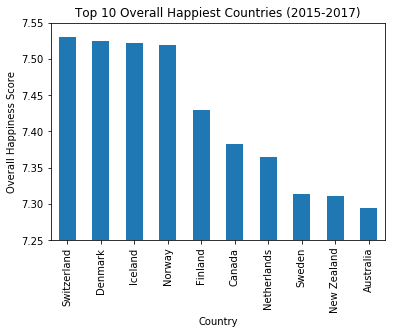

In [112]:
# plot the results.
my_plot = top10_happiest_avg.plot(kind='bar', x='Country', y='AvgHappinessScore', legend=None,title="Top 10 Overall Happiest Countries (2015-2017)")
my_plot.set_xlabel("Country")
my_plot.set_ylabel("Overall Happiness Score")
my_plot.set_ylim([7.25,7.55])

### Now let's dig into the data and analyze the significant factors that attribute to the happiness score of the happiest country

In [166]:
top_country_happiest_factors

,Country,Region,AvgHappinessScore,Economy,Family,Health(LifeExpectancy),Freedom,Trust(GovernmentCorruption),Generosity,DystopiaResidual
0,Switzerland,Western Europe,7.53,1.496273,1.337221,0.88753,0.623737,0.399606,0.289386,2.496242


In [179]:
top_country = pd.read_sql_query("""SELECT 'Economy' AS Importance, AVG(CAST([Economy(GDPperCapita)] AS FLOAT)) AS Score FROM happiness WHERE Country = 'Switzerland'
                                UNION
                                SELECT 'Family' AS Importance, AVG(CAST([Family] AS FLOAT)) AS Score FROM happiness WHERE Country = 'Switzerland'
                                UNION
                                SELECT 'Health(LifeExpectancy)' AS Importance, AVG(CAST([Health(LifeExpectancy)] AS FLOAT)) AS Score FROM happiness WHERE Country = 'Switzerland'
                                UNION
                                SELECT 'Freedom' AS Importance, AVG(CAST([Freedom] AS FLOAT)) AS Score FROM happiness WHERE Country = 'Switzerland'
                                UNION
                                SELECT 'Trust(GovernmentCorruption)' AS Importance, AVG(CAST([Trust(GovernmentCorruption)] AS FLOAT)) AS Score FROM happiness WHERE Country = 'Switzerland'
                                UNION
                                SELECT 'Generosity' AS Importance, AVG(CAST([Generosity] AS FLOAT)) AS Score FROM happiness WHERE Country = 'Switzerland'
                                ORDER BY Score DESC""", con);

### A closer look at what factors were considered important for the citizens of Switzerland

In [180]:
top_country

,Importance,Score
0,Economy,1.496273
1,Family,1.337221
2,Health(LifeExpectancy),0.887530
3,Freedom,0.623737
4,Trust(GovernmentCorruption),0.399606
5,Generosity,0.289386


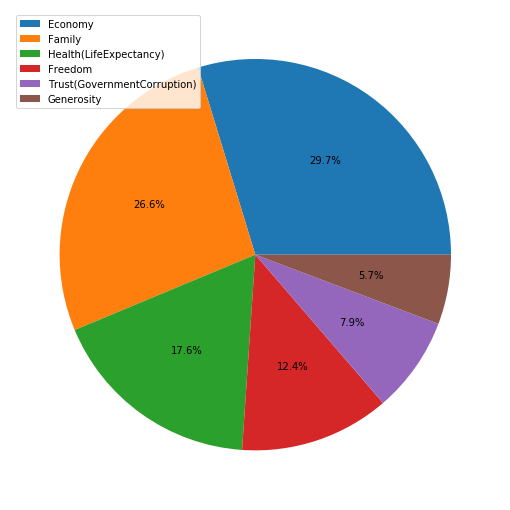

In [183]:
plt.figure(figsize = (9, 9))
x = top_country.Score
plt.pie(x, autopct='%1.1f%%')
plt.legend(labels = top_country.Importance, loc='upper left')
plt.show()

### Between the years 2015 and 2017, the people of Switzerland were the happiest people on Earth. The top 3 factors most relevant to their happiness was Economy, Family, and Health.